## **Contents of the Notebook:**

**Part A: Exploratory Data Analysis(EDA):**

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

**Part B: Feature Engineering and Data Cleaning:**

1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

**Part C: Predictive Modeling**

1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.

## Part A : Exploratory Data Analysis

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data=pd.read_csv('C://Users/thdar/OneDrive/Desktop/titanic3.csv')

In [5]:
data.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
data.isnull().sum() #checking for total null values

Pclass          0
Survived        0
Name            0
Sex             0
Age           263
Sibsp           0
Parch           0
Ticket          0
Fare            1
Cabin        1014
Embarked        2
Boat          823
Body         1188
Home.dest     564
dtype: int64

The Age, Cabin and Embarked have null values. 

###  Number of persons survived (studying the target variable)

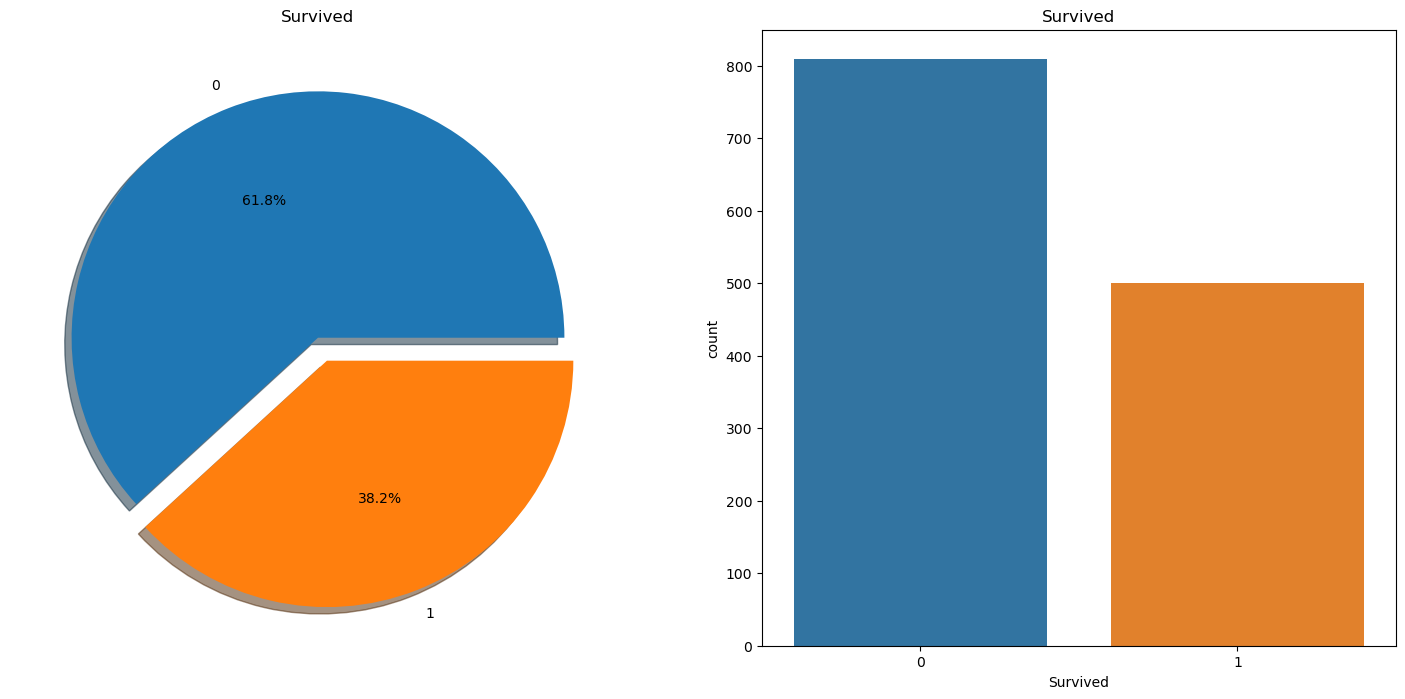

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data,x= 'Survived',ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

### Filling up the 'age' feature:
 - the Age feature has 263 null values. To replace these NaN values, we can assign them the mean age of the dataset.
 - But the problem is, there were many people with many different ages. We just cannot assign a 4 year kid with the mean age that is 29 years.
 - solution : we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

In [9]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

here we are using the Regex: [A-Za-z]+).. So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

In [10]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [11]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [12]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Dona      39.000000
Master     5.482704
Miss      21.834502
Mr        32.545531
Mrs       37.034884
Other     44.923077
Name: Age, dtype: float64

### Filling NaN Ages

In [13]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [14]:
data.Age.isnull().any() #So no null values left finally 

False

----------------------------------------------------------------------------------------------------------------------------- 
## In order to see survival rates as per age category, we plot a Histogram

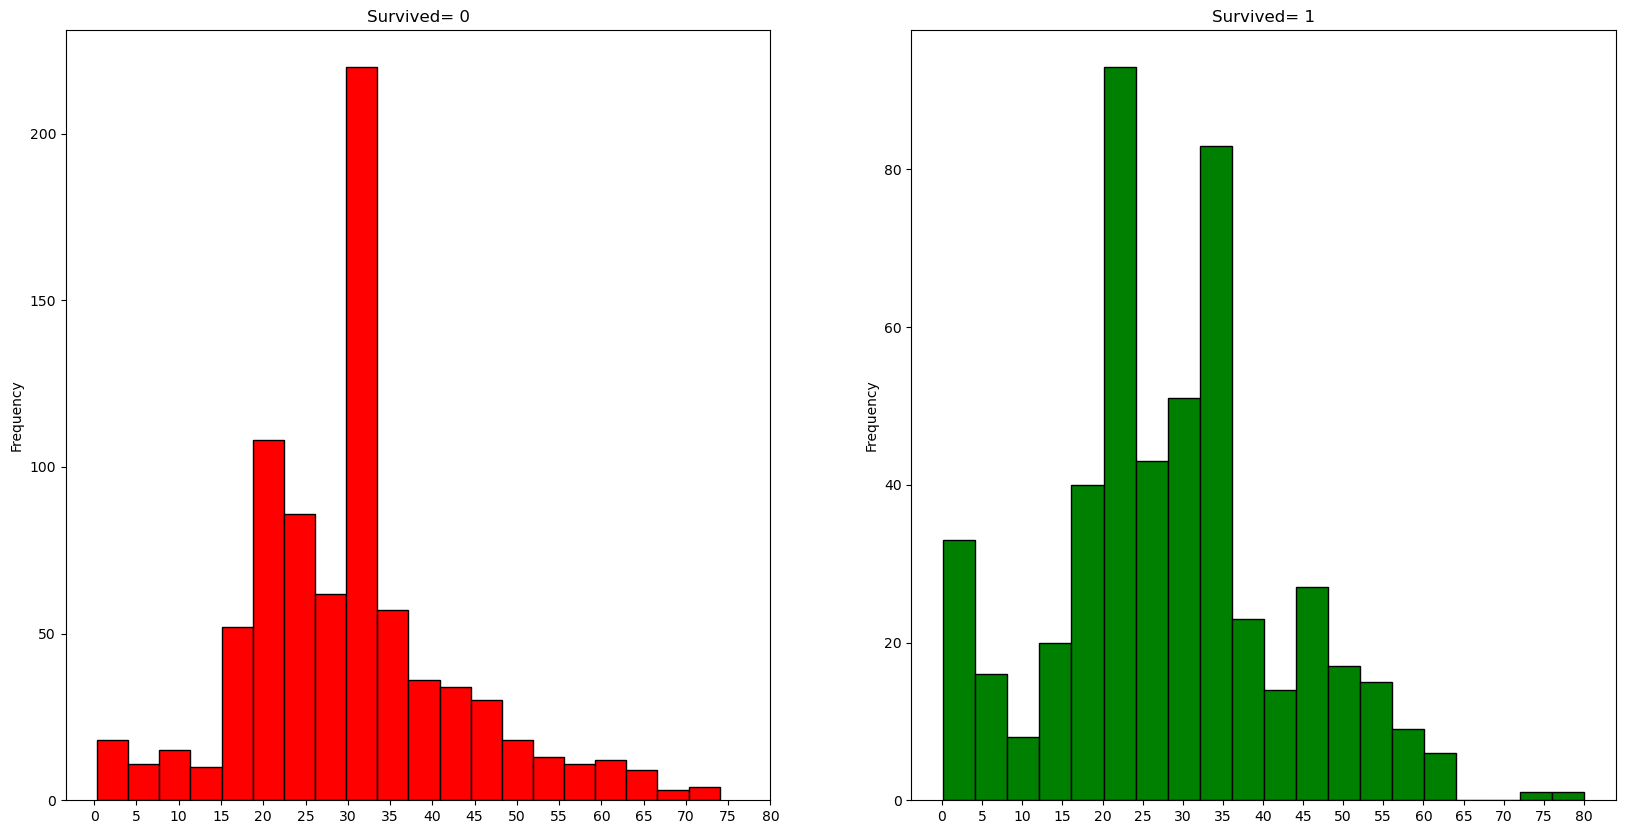

In [15]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Observations:

1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

--------------------------------------------------------------------------------------------------------------------------------
### Filling 'Embarked' column
As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [16]:
data['Embarked'].fillna('S',inplace=True)

In [17]:
data.Embarked.isnull().any()# Finally No NaN values

False

### Correlation Between The Features

In [18]:
data["Sex"] = [1 if i == "male" else 0 for i in data["Sex"]] 
data["Embarked"] = [0 if i == "S" else i for i in data["Embarked"]] 
data["Embarked"] = [1 if i == "C" else i for i in data["Embarked"]] 
data["Embarked"] = [2 if i == "Q" else i for i in data["Embarked"]] 
## or one hot encoder could have been used

In [19]:
cols = ["Survived","Pclass","Sex","Age","Sibsp","Parch","Fare","Embarked"]
data_corr = data[cols].corr()
data_corr

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
Survived,1.000000,-0.312469,-0.528693,-0.070406,-0.027825,0.082660,0.244265,0.098450
Pclass,-0.312469,1.000000,0.124617,-0.373462,0.060832,0.018322,-0.558629,0.038875
Sex,-0.528693,0.124617,1.000000,0.089642,-0.109609,-0.213125,-0.185523,-0.120423
Age,-0.070406,-0.373462,0.089642,1.000000,-0.221899,-0.141582,0.167479,0.009919
Sibsp,-0.027825,0.060832,-0.109609,-0.221899,1.000000,0.373587,0.160238,-0.073461
Parch,0.082660,0.018322,-0.213125,-0.141582,0.373587,1.000000,0.221539,-0.095523
Fare,0.244265,-0.558629,-0.185523,0.167479,0.160238,0.221539,1.000000,0.061126
Embarked,0.098450,0.038875,-0.120423,0.009919,-0.073461,-0.095523,0.061126,1.000000


NameError: name 'fig' is not defined

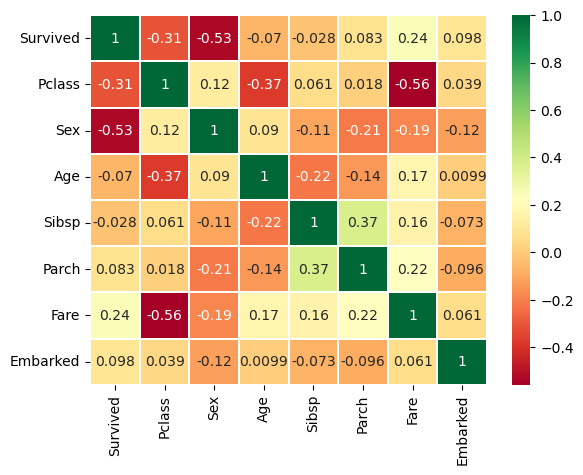

In [21]:
sns.heatmap(data_corr,annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->correlation matrix
fig.set_size_inches(10,8)
plt.show()

# Interpreting The Heatmap
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION**: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

**NEGATIVE CORRELATION** : If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.37. So we can carry on with all features.

## Part B:  Feature Engineering and Data Cleaning
**Now what is Feature Engineering?**

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

**'age' column**

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [22]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.dest,Initial,Age_band
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,0,2,NaN,"St Louis, MO",Miss,1
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,0,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0


In [23]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,575
2,473
0,142
3,106
4,13


**'Family_Size and Alone'**

 At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [24]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['Sibsp']  #family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1  #Alone



**Fare_Range**

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [25]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.896]",0.228487
"(7.896, 14.454]",0.284375
"(14.454, 31.275]",0.435976
"(31.275, 512.329]",0.585139


- As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.
- Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [26]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

In [172]:
#g = sns.FacetGrid(data, col="Fare_cat", hue="Survived")
#g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
#g.add_legend()
#plt.show()

**Dropping UnNeeded Features**

Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

In [27]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range'],axis=1,inplace=True)

In [28]:
data

,Pclass,Survived,Sex,Sibsp,Parch,Embarked,Boat,Body,Home.dest,Initial,Age_band,Family_Size,Alone,Fare_cat
0,1,1,0,0,0,0,2,NaN,"St Louis, MO",Miss,1,0,1,3
1,1,1,1,1,2,0,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0,3,0,3
2,1,0,0,1,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,3,0,3
3,1,0,1,1,2,0,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,1,3,0,3
4,1,0,0,1,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,1,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,1,0,1,NaN,328.0,NaN,Miss,0,1,0,2
1305,3,0,0,1,0,1,NaN,NaN,NaN,Miss,1,1,0,2
1306,3,0,1,0,0,1,NaN,304.0,NaN,Mr,1,0,1,0
1307,3,0,1,0,0,1,NaN,NaN,NaN,Mr,1,0,1,0


In [37]:
col = ["Survived","Pclass","Sex","Sibsp","Parch","Embarked","Age_band","Family_Size","Alone", "Fare_cat"]
data_a = data[col].corr()
data_a


,Survived,Pclass,Sex,Sibsp,Parch,Embarked,Age_band,Family_Size,Alone,Fare_cat
Survived,1.000000,-0.312469,-0.528693,-0.027825,0.082660,0.098450,-0.099339,0.026876,-0.201719,0.272798
Pclass,-0.312469,1.000000,0.124617,0.060832,0.018322,0.038875,-0.323498,0.050027,0.147393,-0.651861
Sex,-0.528693,0.124617,1.000000,-0.109609,-0.213125,-0.120423,0.123703,-0.188583,0.284537,-0.235715
Sibsp,-0.027825,0.060832,-0.109609,1.000000,0.373587,-0.073461,-0.224497,0.861952,-0.591077,0.383522
Parch,0.082660,0.018322,-0.213125,0.373587,1.000000,-0.095523,-0.147263,0.792296,-0.549022,0.371730
Embarked,0.098450,0.038875,-0.120423,-0.073461,-0.095523,1.000000,0.043194,-0.100529,0.046826,-0.118695
Age_band,-0.099339,-0.323498,0.123703,-0.224497,-0.147263,0.043194,1.000000,-0.228154,0.152331,0.063578
Family_Size,0.026876,0.050027,-0.188583,0.861952,0.792296,-0.100529,-0.228154,1.000000,-0.688864,0.455441
Alone,-0.201719,0.147393,0.284537,-0.591077,-0.549022,0.046826,0.152331,-0.688864,1.000000,-0.558472
Fare_cat,0.272798,-0.651861,-0.235715,0.383522,0.371730,-0.118695,0.063578,0.455441,-0.558472,1.000000


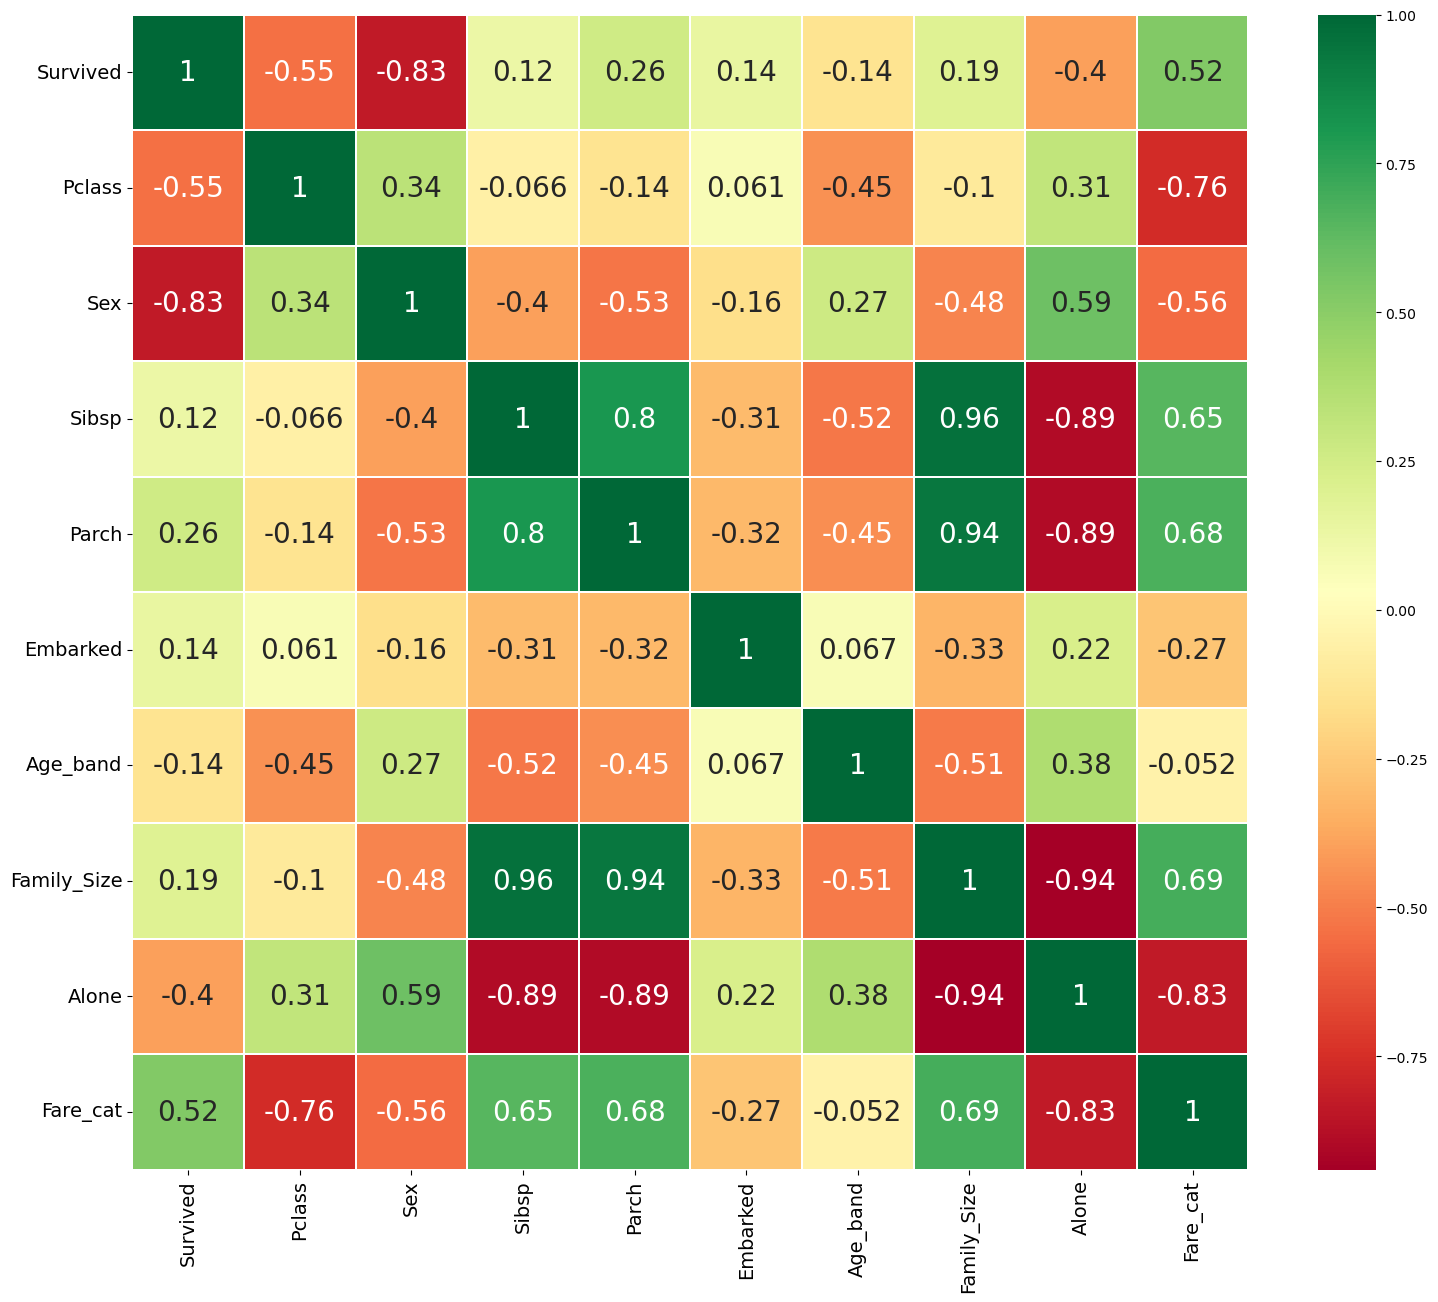

In [38]:
sns.heatmap(data_a.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being **SibSp andd Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size.**

## Part C : Predictive Modeling
We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [31]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [63]:
data.drop(['Home.dest','Initial','Boat','Body'],axis = 1, inplace = True)


KeyError: "['Home.dest', 'Initial', 'Boat', 'Body'] not found in axis"

In [64]:
data

,Pclass,Survived,Sex,Sibsp,Parch,Embarked,Age_band,Family_Size,Alone,Fare_cat
0,1,1,0,0,0,0,1,0,1,3
1,1,1,1,1,2,0,0,3,0,3
2,1,0,0,1,2,0,0,3,0,3
3,1,0,1,1,2,0,1,3,0,3
4,1,0,0,1,2,0,1,3,0,3
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,1,0,1,0,1,0,2
1305,3,0,0,1,0,1,1,1,0,2
1306,3,0,1,0,0,1,1,0,1,0
1307,3,0,1,0,0,1,1,0,1,0


In [65]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [111]:
model_1=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model_1.fit(train_X,train_Y)
prediction1=model_1.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.7506361323155216


### Linear Support Vector Machine(linear-SVM)

In [71]:
model_2=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model_2.fit(train_X,train_Y)
prediction2=model_2.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.7480916030534351


### Logistic Regression

In [72]:
model_3 = LogisticRegression()
model_3.fit(train_X,train_Y)
prediction3=model_3.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7506361323155216


### Decision Tree

In [73]:
model_4=DecisionTreeClassifier()
model_4.fit(train_X,train_Y)
prediction4=model_4.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.7455470737913485


### K-Nearest Neighbours(KNN)

In [74]:
model_5=KNeighborsClassifier() 
model_5.fit(train_X,train_Y)
prediction5=model_5.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.7506361323155216


Now the accuracy for the KNN model changes as we change the values for **n_neighbours** attribute. The default value is **5**. Lets check the accuracies over various values of n_neighbours.

In [109]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

AttributeError: 'Series' object has no attribute 'append'

### Gaussian Naive Bayes

In [78]:
model_6=GaussianNB()
model_6.fit(train_X,train_Y)
prediction6=model_6.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.6564885496183206


### Random Forests

In [79]:
model_7=RandomForestClassifier(n_estimators=100)
model_7.fit(train_X,train_Y)
prediction7=model_7.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.7582697201017812


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is **No**, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as **model variance**.

To overcome this and get a generalized model,we use **Cross Validation**.


# Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset. 

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [82]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,1.000000,0.000000
Radial Svm,0.996947,0.009160
Logistic Regression,1.000000,0.000000
KNN,0.956465,0.019311
Decision Tree,1.000000,0.000000
Naive Bayes,1.000000,0.000000
Random Forest,1.000000,0.000000


<Axes: >

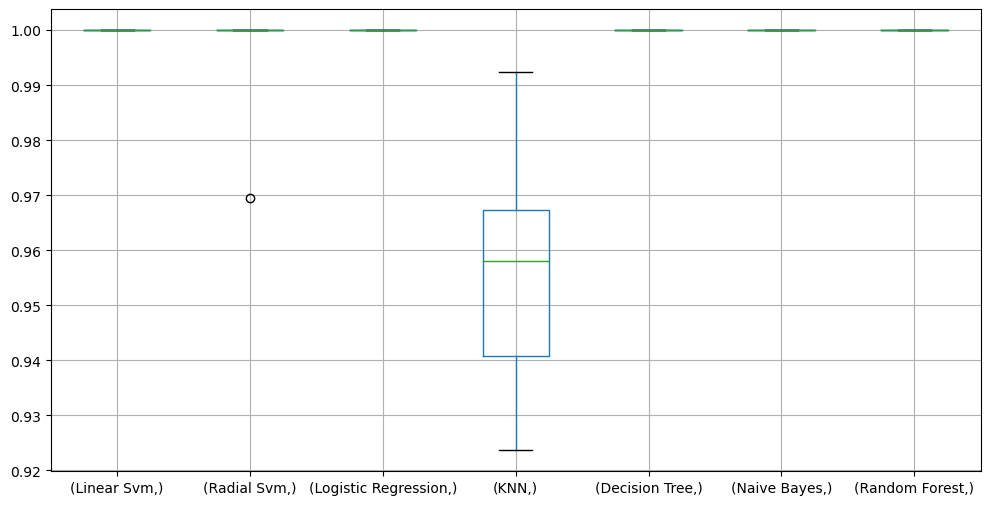

In [106]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

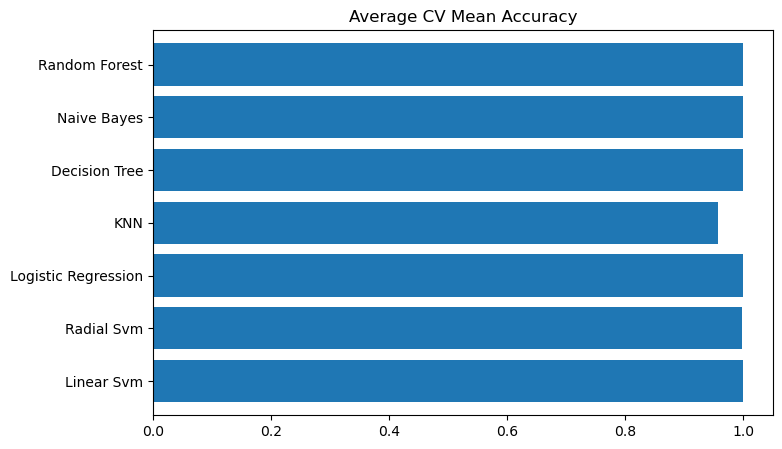

In [107]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

## Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.

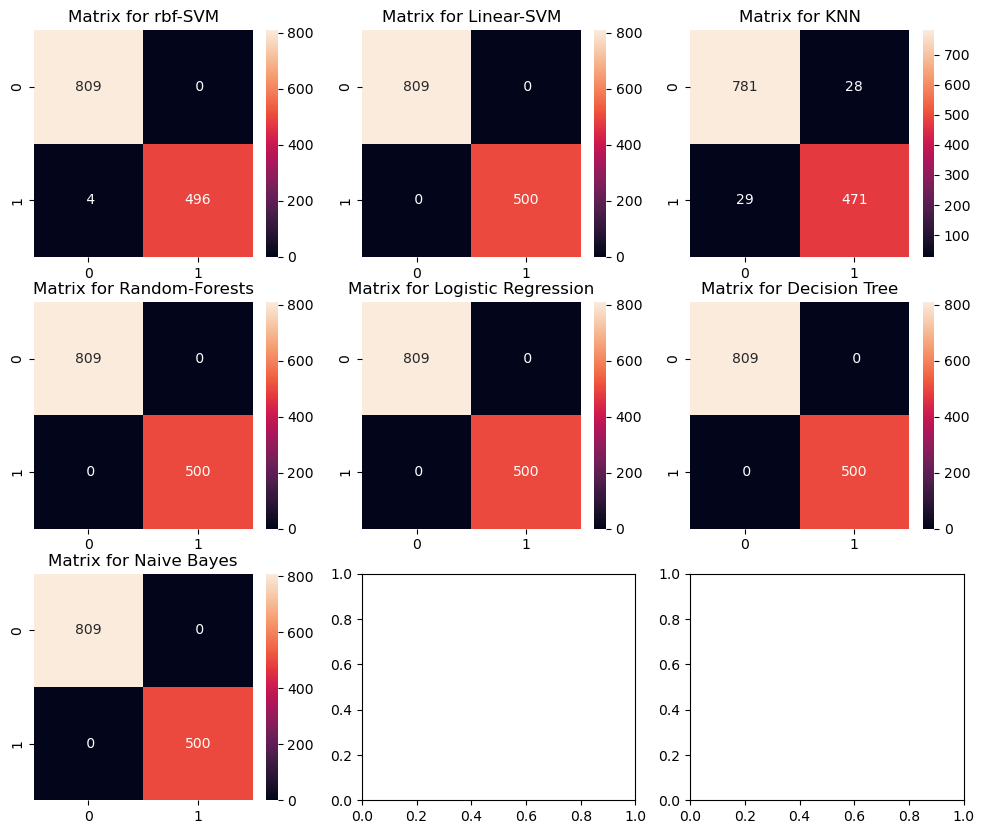

In [108]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are **491(for dead) + 247(for survived)** with the mean CV accuracy being **(491+247)/891 = 82.8%** which we did get earlier.

2)**Errors**-->  Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

### Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.



#### SVM

In [90]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
1.0
SVC(C=0.05, gamma=0.1, kernel='linear')


#### Random Forests

In [91]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
1.0
RandomForestClassifier(random_state=0)


The best score for Rbf-Svm is **82.82% with C=0.05 and gamma=0.1**.
For RandomForest, score is abt **81.8% with n_estimators=900**.

# Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is **Ensembling**, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [115]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.7709923664122137
The cross validated score is 1.0


## Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

#### Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of **n_neighbours**, as small value of n_neighbours.

In [95]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.7302798982188295
The cross validated score for bagged KNN is: 0.9663945977686437


#### Bagged DecisionTree


In [96]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.7633587786259542
The cross validated score for bagged Decision Tree is: 1.0


## Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

#### AdaBoost(Adaptive Boosting)

The weak learner or estimator in this case is a Decsion Tree.  But we can change the dafault base_estimator to any algorithm of our choice.

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 1.0


#### Stochastic Gradient Boosting

Here too the weak learner is a Decision Tree.

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 1.0


#### XGBoost

In [104]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 1.0


We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning

#### Hyper-Parameter Tuning for AdaBoost

In [101]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
1.0
AdaBoostClassifier(learning_rate=0.05, n_estimators=100)


The maximum accuracy we can get with AdaBoost is **83.16% with n_estimators=200 and learning_rate=0.05**

### Confusion Matrix for the Best Model

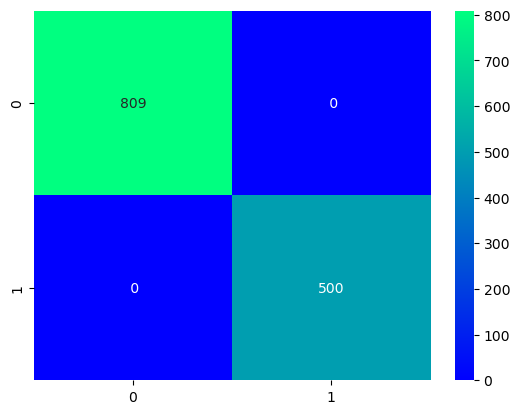

In [102]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

Feature Impotrtance

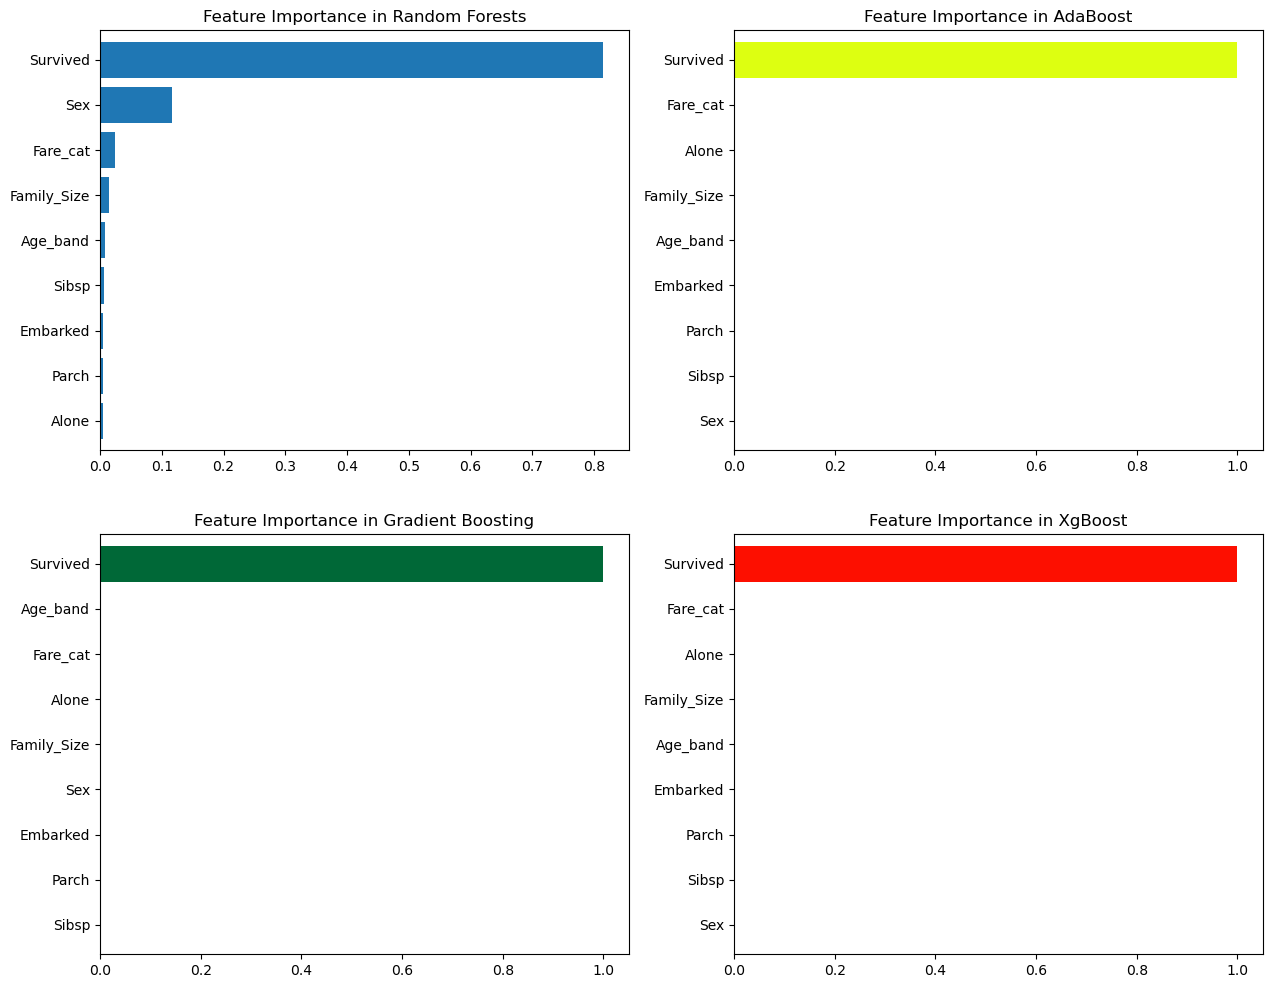

In [105]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

#### Observations:

1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.